
__Задание 1. Генерация случайных величин с заранее заданной ковариационной матрицей__

In [1]:
import numpy as np

n = 6
B = np.random.random(size=(n, n))
S = B @ B.T

try:
    A = np.linalg.cholesky(S)
except np.linalg.LinAlgError as error:
    print("Ошибка при вычислении разложения Холецкого:", error)
    A = np.eye(n)

m = np.random.uniform(0, 10, n)
z = m + np.random.normal(size=n)
x = m + A @ z

print("x =", x)

x = [19.9638294  25.29125854 23.28205167 16.15111372 17.40092005 11.1925567 ]


__Задача 2. Обработка экспериментальных данных.__

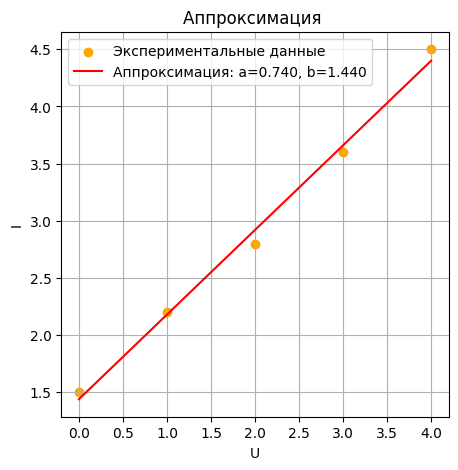

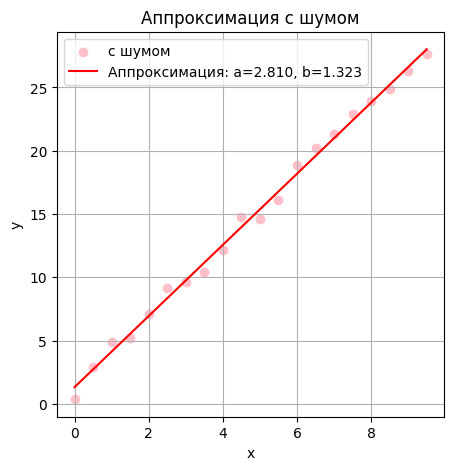

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a * x + b

data = pd.read_excel(r"C:\Users\nadez\Downloads\example_data.xlsx")


T = data["T"][:-1]
U = data["U"][:-1]
I = data["I"][:-1]

plt.figure(figsize=(5, 5))
plt.scatter(U, I, label='Экспериментальные данные', color='orange')
popt, pcov = curve_fit(linear_func, U, I)
plt.plot(U, linear_func(U, *popt), 'r-', label='Аппроксимация: a=%.3f, b=%.3f' % tuple(popt))
plt.xlabel("U")
plt.ylabel("I")
plt.title("Аппроксимация ")
plt.legend()
plt.grid(True)
plt.show()

true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, label='с шумом', color='pink')
popt, pcov = curve_fit(linear_func, xs, ys)
plt.plot(xs, linear_func(xs, *popt), 'r-', label='Аппроксимация: a=%.3f, b=%.3f' % tuple(popt))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Аппроксимация с шумом")
plt.legend()
plt.grid(True)
plt.show()


__Задача 3. Правдоподобие для гауссовой вероятностной модели__

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy. stats import norm

mu = 1
sigma = 2
N = 1000
xs = np.random.normal(mu, sigma, size=N)

mu_exp = xs.mean()
sigma_exp = (xs.var()) ** (1/2)
print("Параметры выборки: mu = ", mu, "sigma = ", sigma)
print("Аппроксимация: mu = ", mu_exp, "sigma = ", sigma_exp)

Параметры выборки: mu =  1 sigma =  2
Аппроксимация: mu =  1.0553750886549043 sigma =  2.05045393379917
